# Exploring Lending Club Data

### Summary
**Big Picture Summary:** The purpose of this notebook is to explore certain aspects of the Lending Club Data that was cleaned in the notebook [Data_Wrangling.ipynb](https://github.com/paulb17/Springboard/blob/master/Capstone%20Project%201/Data_Wrangling%20.ipynb). Once the data is explored, it will be used to create a loan classification model for conservative investors in the notebook [Data_Modeling.ipynb](). 

**Explored questions:** As conservative investors are the audience for this project, the questions investigated are in relation to them. These question include:
1. Are Lending Club borrowers risky investments?
2. Is it better to invest in borrowers with longer credit histories?
3. Is it better to invest in borrowers with longer employment histories?
4. Is it better to invest in borrowers with greater annual income?
5. Is it better to invest in borrowers requesting smaller loan amounts?

## Importing the data

In [1]:
# importing relevant packages
import pandas as pd
import math
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# creating plots using seaborn setting 
sns.set()

# using jupyter magic to display plots in line
%matplotlib inline

# importing the dataset
loan_data = pd.read_csv('Wrangled_Loan_data.csv', low_memory=False)

A quick view of the data is shown below to ensure it was imported correctly

In [2]:
# viewing the size of the dataset
print('The size of the dataset: ' + str(loan_data.shape))

# viewing the first few columns of the dataset
loan_data.head()

The size of the dataset: (39736, 79)


,loan_amnt,int_rate,installment,grade,sub_grade,emp_length,annual_inc,loan_status,dti,delinq_2yrs,...,OH,OR,PA,SC,South,TX,VA,WA,WI,West
0,5000.0,10.65,162.87,2.0,7.0,10.0,24000.0,1,27.65,0.0,...,0,0,0,0,0,0,0,0,0,0
1,2500.0,15.27,59.83,3.0,14.0,0.0,30000.0,0,1.00,0.0,...,0,0,0,0,0,0,0,0,0,0
2,2400.0,15.96,84.33,3.0,15.0,10.0,12252.0,1,8.72,0.0,...,0,0,0,0,0,0,0,0,0,0
3,10000.0,13.49,339.31,3.0,11.0,10.0,49200.0,1,20.00,0.0,...,0,0,0,0,0,0,0,0,0,0
4,3000.0,12.69,67.79,2.0,10.0,1.0,80000.0,1,17.94,0.0,...,0,1,0,0,0,0,0,0,0,0


Next, to get a better understanding of the data that will be used a quick look through the column names and the data types of each column is shown below:

In [3]:
# displaying column names
loan_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39736 entries, 0 to 39735
Data columns (total 79 columns):
loan_amnt                                 39736 non-null float64
int_rate                                  39736 non-null float64
installment                               39736 non-null float64
grade                                     39736 non-null float64
sub_grade                                 39736 non-null float64
emp_length                                39736 non-null float64
annual_inc                                39736 non-null float64
loan_status                               39736 non-null int64
dti                                       39736 non-null float64
delinq_2yrs                               39736 non-null float64
inq_last_6mths                            39736 non-null float64
mths_since_last_delinq                    39736 non-null int64
mths_since_last_record                    39736 non-null int64
open_acc                                  39736 non-

## Data Story

### Are Lending Club Borrowers risky investments?

Prior to investing in Lending Club, it is important for an investor to understand where in the risk spectrum borrowers fall. To evaluate this, we shall take a look at the borrowers FICO scores. 

FICO scores are used by many lenders to determine how risky a borrower is. For this reason, it is expected that the likelihood of a borrower defaulting will decrease as the FICO score increases. Below are graphs showing the proportion of borrowers that defaulted in various FICO score ranges and the distribution of FICO scores.

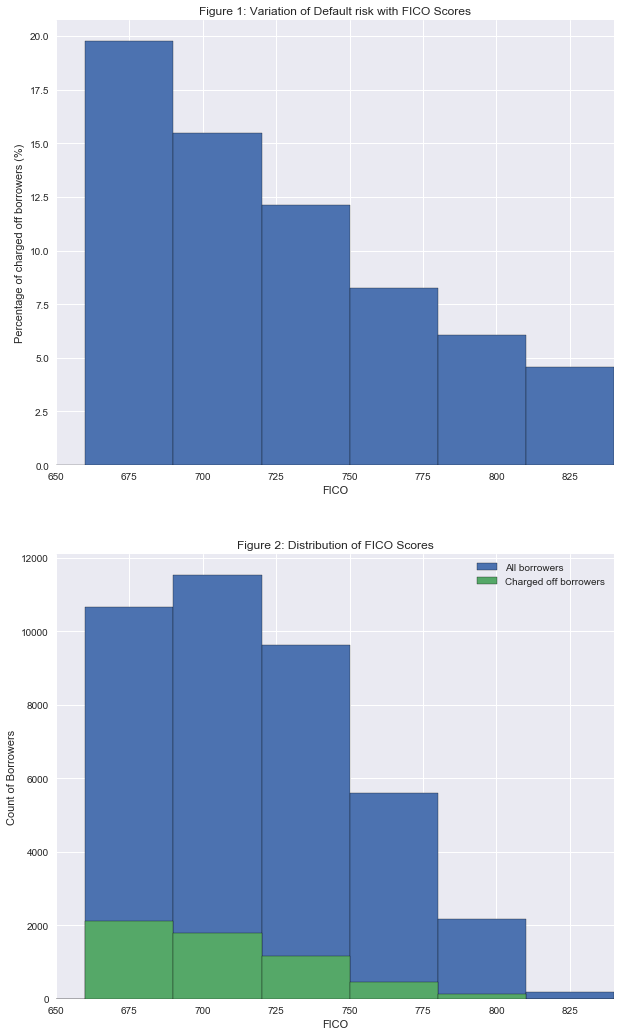

In [4]:
# creating a dataframe of charged off loans
charged_off = loan_data[loan_data['loan_status'] == 0]

# creating empty list for bins and specifying bin widths 
bin_widths = list()
bin_width = 30

# assigning the range of FICO scores to be displayed 
max_el = 840
min_el = 650

# filling in list of bin widths
for num in range(int(round((max_el/bin_width)+1))):
    bin_widths.append((num)*bin_width)

# creating figure
plt.figure(figsize = (10,18))

# plotting distribution of FICO scores
plt.subplot(2,1,2)
plt.title("Figure 2: Distribution of FICO Scores")
plt.xlabel("FICO")
plt.ylabel('Count of Borrowers')
plt.xlim([min_el,max_el])

# counting the number of borrowers in each FICO score category 
counts_tot, bins_tot, bars_tot= plt.hist(loan_data.fico_average, bins = bin_widths, 
                                         label = 'All borrowers', edgecolor = 'k')

# count of the number of borrowers in each FICO score category that were charged off
counts, bins, bars = plt.hist(charged_off['fico_average'], bins = bin_widths, 
                              label = "Charged off borrowers", edgecolor = 'k')

# adding a legend to the plot
plt.legend()

# Make a bar chart showing the proportions of FICO scores
plt.subplot(2, 1, 1)
plt.title("Figure 1: Variation of Default risk with FICO Scores")

# ignoring divisions by 0
with np.errstate(divide='ignore', invalid='ignore'):
     
    proportions = 100*counts/counts_tot
    plt.bar(np.arange(0, max_el, bin_width), height = proportions, width = bin_width, align = 'edge',
            edgecolor = 'black')
    plt.xlim([min_el,max_el])
    plt.xlabel("FICO")
    plt.ylabel("Percentage of charged off borrowers (%)")
    plt.plot(x = bin_widths[-6:], y= proportions[-6:])

As expected, there is a clear trend in Figure 1 showing that the risk of a borrower defaulting decreases as FICO scores increase. We see that the lowest FICO score range (660-690) has a default rate of about 20% while highest FICO score range (810-830) has a default rate of about 5%. We can also see from the figure that Lending Club borowers tend to have FICO scores ranging from 660 to 830.

![title](Fico Score ranges.pdf)

The above table obtained from the [FICO website](https://www.myfico.com/Downloads/Files/myFICO_UYFS_Booklet.pdf), contains descriptions of FICO scores based on categorized ranges. From the table, we can tell that Lending Club borrowers generally have FICO scores that are categorized as good, very good and exceptional. This is a clear indicator that Lending Club attempts to offer investors less risky borrowers. 

Within the selected borrowers available on Lending Club, the FICO score distribution (Figure 2) is rightly skewed. This suggests that most of the borrowers available on the Lending Club market place are in the good FICO score category: a category that consists of borrowers with credit risks less than or approximately equivalent to that of the average U.S. consumer. 

### Is it better to invest in borrowers with longer credit histories?
Credit history is an important component used in the evaluation of a borrowers' credit risk. The FICO score models use a borrower's credit history (age of oldest account, age of newest account and average age of all accounts) in determining credit risk; in fact, borrowers typically require at least 3 years of credit history to be in the exceptional FICO score category.  

To investigate how credit history should impact the decisions of Lending Club investors, we take a look at the distribution and default risk associated with the age of borrowers' oldest credit accounts.

Text(0,0.5,'Percentage of charged off borrowers (%)')

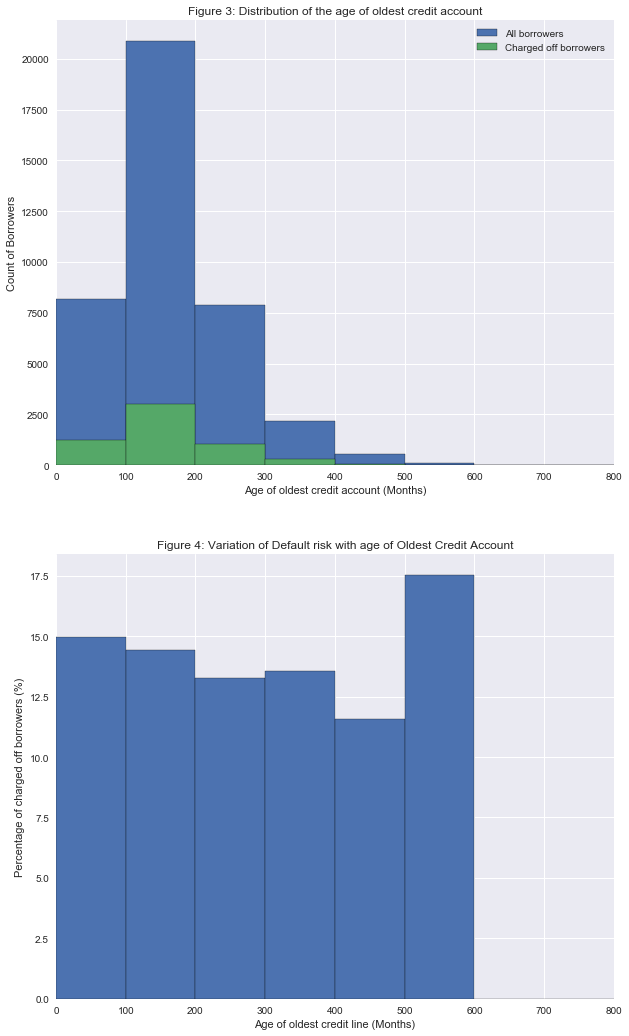

In [5]:
# creating empty list for bins and specifying bin widths
bin_widths = list()
bin_width = 100

# filling in list of bin widths
for num in range(int(round((800/bin_width)+1))):
    bin_widths.append((num)*bin_width)

# creating the figure
plt.figure(figsize = (10,18))

# plotting the distribution of ages of oldest credit account
plt.subplot(2,1,1)
plt.title('Figure 3: Distribution of the age of oldest credit account')
plt.xlabel("Age of oldest credit account (Months)")
plt.ylabel('Count of Borrowers')
plt.xlim([0,800])

# counting the number of borrowers in each age of account group 
counts_tot, bins_tot, bars_tot= plt.hist(loan_data.age_cr_line, bins = bin_widths, 
                                         label = 'All borrowers', edgecolor = 'k')

# count of the number of borrowers in each age of account group that were charged off
counts, bins, bars = plt.hist(charged_off['age_cr_line'], bins = bin_widths, 
                              label = "Charged off borrowers", edgecolor = 'k')

# adding a legend to the plot
plt.legend()

# calculating the proportions 
proportions = 100*counts/counts_tot

# Make a bar chart showing the proportions 
plt.subplot(2, 1, 2)
plt.bar(np.arange(0, 800, bin_width), height = proportions, width = bin_width, align = 'edge',
        edgecolor = 'black')
plt.title('Figure 4: Variation of Default risk with age of Oldest Credit Account')
plt.xlim([0,800])
plt.xlabel("Age of oldest credit line (Months)")
plt.ylabel("Percentage of charged off borrowers (%)")

As shown in Figure 3, the distribution of the age of borrowers' oldest credit accounts is right skewed. In addition, we can see that most borrowers offered to investors in the Lending Club market place have an oldest credit account aged between 100 to 200 months.

In Figure 4 above, we note that for the first 500 months, the percentage of defaulters *generally* decreases as the age of oldest credit account increases. For borrowers whose oldest credit accounts are aged between 500-600 months, there is a significant increase in the percentage of defaulters. This unexpected deviation from the trend is an indicator that age of oldest credit account on its own is not sufficient to determine a borrowers credit risk. It also explains why the credit history component of the FICO score model accounts for only 15% of a borrowers credit score: other factors which measure how well credit accounts have been managed over time account for the other 85%.

Evidently, it will be advantageous for investors to consider other factors alongside credit history when making investment decisions. Simply investing in borrowers with the longest credit histories will potentially lead to an increase in the risk of default within an investors portfolio.

### Is it better to Invest in borrowers with longer employment lengths?
It is believed that borrowers with longer lengths of employment are less likely to default on loans. This is because long employment lengths are an indicator of a stable income. Similar to before, we show the two plots below to begin investigating this:
* Figure 5 shows the distribution of employment length
* Figure 6 shows proportion of borrowers that defaulted in each employment length category.

Text(0,0.5,'Percentage of charged off borrowers (%)')

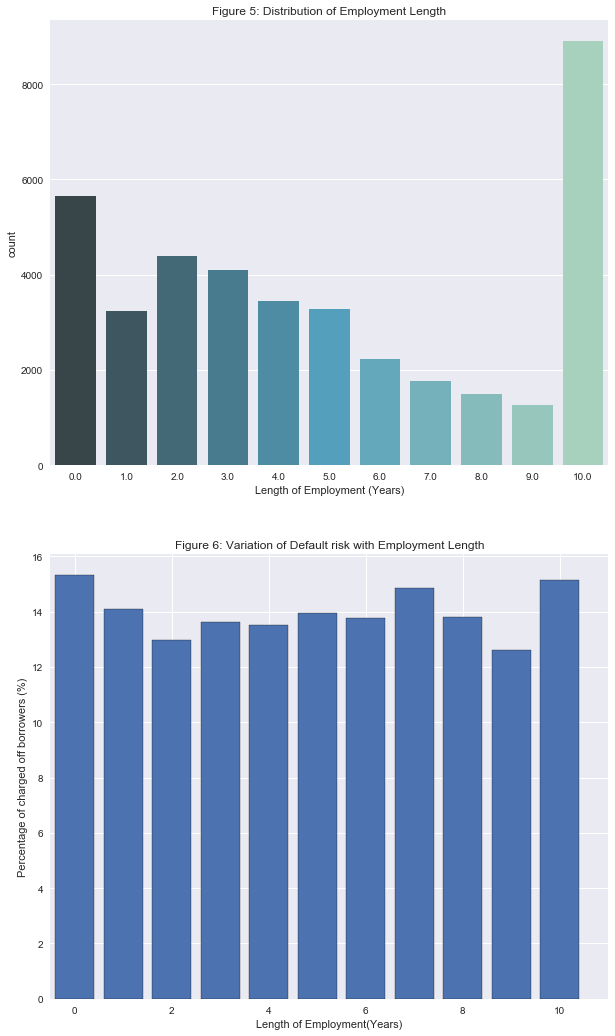

In [6]:
# creating a dataframe of charged off loans
charged_off = loan_data[loan_data['loan_status'] == 0]

# count of the number of people of each employment length that were charged off
count_charged_off  = charged_off['emp_length'].value_counts().sort_index()

# counting the number of people of each employment 
count_total = loan_data.emp_length.value_counts().sort_index()

# calculating the proportiong of people of each employment length 
proportion = 100*count_charged_off/count_total


# creating graphs 
plt.figure(figsize = (10,18))

# plotting the distribution of employment length
plt.subplot(2,1,1)
plt.title('Figure 5: Distribution of Employment Length')
sns.countplot(x = 'emp_length', data=loan_data, palette='GnBu_d')
plt.xlabel('Length of Employment (Years)')

# plotting a chart showing the proportiong of people charged off in each category
plt.subplot(2,1,2)
bin_width = 0.8
plt.bar(np.arange(0, 11, 1), height = proportion, width = bin_width, align = 'center',
        edgecolor = 'black')
plt.xlim([-0.5,11])
plt.title('Figure 6: Variation of Default risk with Employment Length')
plt.xlabel("Length of Employment(Years)")
plt.ylabel("Percentage of charged off borrowers (%)")



The employment length distribution shown in Figure 5 is trimodal. The mode on the right end of the distribution consists of people with 10 or more years of employment. A majority of borrowers in the Lending Club marketplace fall into this category. 

In Figure 6, we see that there is no trend between the employment length and the percentage of borrowers that defaulted. While this is different from what was expected, it is in agreement with the findings of the Fair Isaac Corporation (FICO): FICO score models do not make use of employment history information as it was found not to be predictive of future credit performance. It will therefore be an unreasonable investment strategy to select borrowers based on employment lengths.



### Is it better to invest in borrowers with greater annual income?
Similar to the length of employment, FICO score models do not make use of annual income in computing a borrower's credit score as they have found it does not predict future credit performance. It is worth investigating whether this findings hold for the Lending Club dataset.

Text(0,0.5,'Percentage of charged off borrowers (%)')

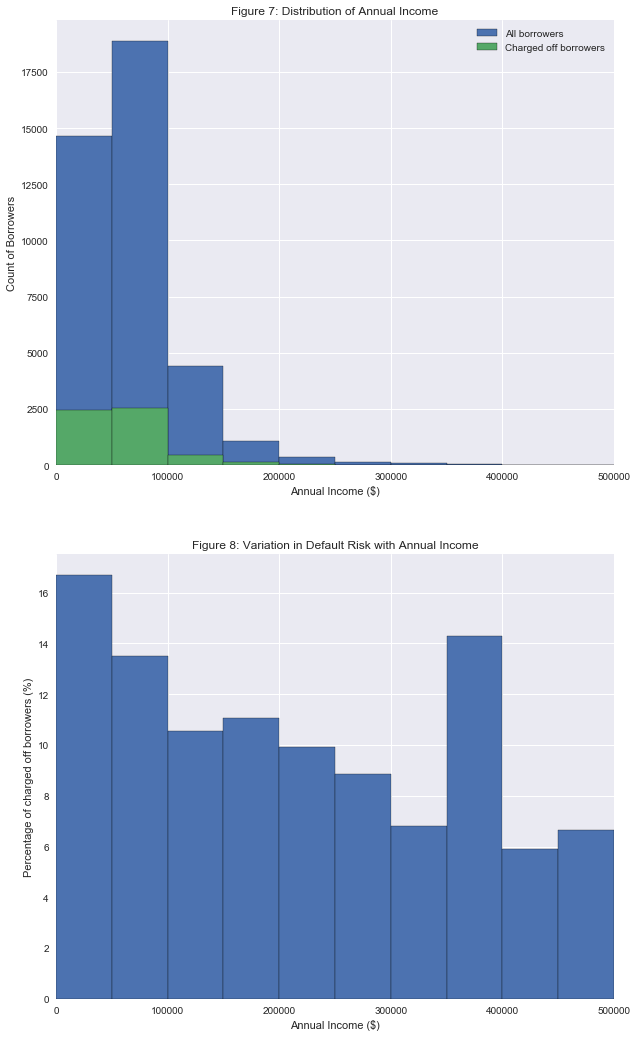

In [7]:
# creating a dataframe of charged off loans
charged_off = loan_data[loan_data['loan_status'] == 0]

# creating empty list for bin edges and specifying bin width
bin_widths = list()
bin_width = 50000

# choosing the maximum x axis display
max_el = 500000

# filling in list of bin widths
for num in range(int(round((max_el/bin_width)+1))):
    bin_widths.append((num)*bin_width)

# creating the figure
plt.figure(figsize = (10,18))

# plotting the distribution of annual income
plt.subplot(2,1,1)
plt.title('Figure 7: Distribution of Annual Income')
plt.xlabel("Annual Income ($)")
plt.ylabel('Count of Borrowers')
plt.xlim([0,max_el])

# counting the number of borrowers in each annual income category
counts_tot, bins_tot, bars_tot= plt.hist(loan_data.annual_inc, bins = bin_widths, 
                                         label = 'All borrowers', edgecolor = 'k')

# count of the number of borrowers in each annual income category that were charged off
counts, bins, bars = plt.hist(charged_off['annual_inc'], bins = bin_widths, 
                              label = "Charged off borrowers", edgecolor = 'k')

# displaying a legend on the plot
plt.legend()

# calculating the proportions of borrowers charged off in each category
proportions = 100*counts/counts_tot

# Make a bar chart showing the proportions 
plt.subplot(2, 1, 2)
plt.bar(np.arange(0, max_el, bin_width), height = proportions, width = bin_width, align = 'edge',
        edgecolor = 'black')
plt.title('Figure 8: Variation in Default Risk with Annual Income')
plt.xlim([0,max_el])
plt.xlabel("Annual Income ($)")
plt.ylabel("Percentage of charged off borrowers (%)")

It should be noted that in figures 7 and 8 only incomes less than \$500,000 are shown and analyzed. Incomes above $500,000 were excluded because they are few and make the graphs difficult to read.

We see from Figure 7 that the income distribution is right skewed with most borrowers earning between \$50,000 to \$100,000. 

The graphs in Figure 8 shows that the risk of borrowers defaulting generally decreases as annual incomes increase for borrowers earning between \$0 to \$350,,000. Oddly borrowers earning between \$350,000 to \$400,000 deviate from this trend. It is worth noting that the significant deviation in the general decline occurs for annual incomes in which the count of borrowers is relatively small (less than 1% of the total borrowers):

|   Annual Income ($)   | Count    | Percantage of borrowers (%) |
|-----------------------|----------|-----------------------------|
|  350,000 - 400,000    |    35    |           0.088             |
|  400,000 - 450,000    |    17    |           0.042             |
|  450,000 - 500,000    |    8     |           0.038             |

It is possible that the deviation is not statistically significant. In other words, if we take the whole population of borrowers earning \$350,000 - \$400,000 annual income in the peer to peer market place the percentage of defaulters could be lower.

Overall, the annual income appears to be a reasonable indicator of the risk of a borrower defaulting for incomes below \$350,000. For incomes between \$350,000 to $500,000, further investigation is needed to determine whether the annual income can still be a good predictor of default risk. Evidently, it will be beneficial to use the annual income data in conjunction with other metrics when making investment decisions. 


### Is it better to invest in borrowers requesting smaller loans?
Larger loan amounts typically means larger installments. Having consistently large financial obligations can be difficult to manage particularly if emergencies areise. For this reason, it is expected that greater loan amounts will have more defaults. 

Text(0.5,1,'Figre 10: Variation of Loan amounts with Default risk')

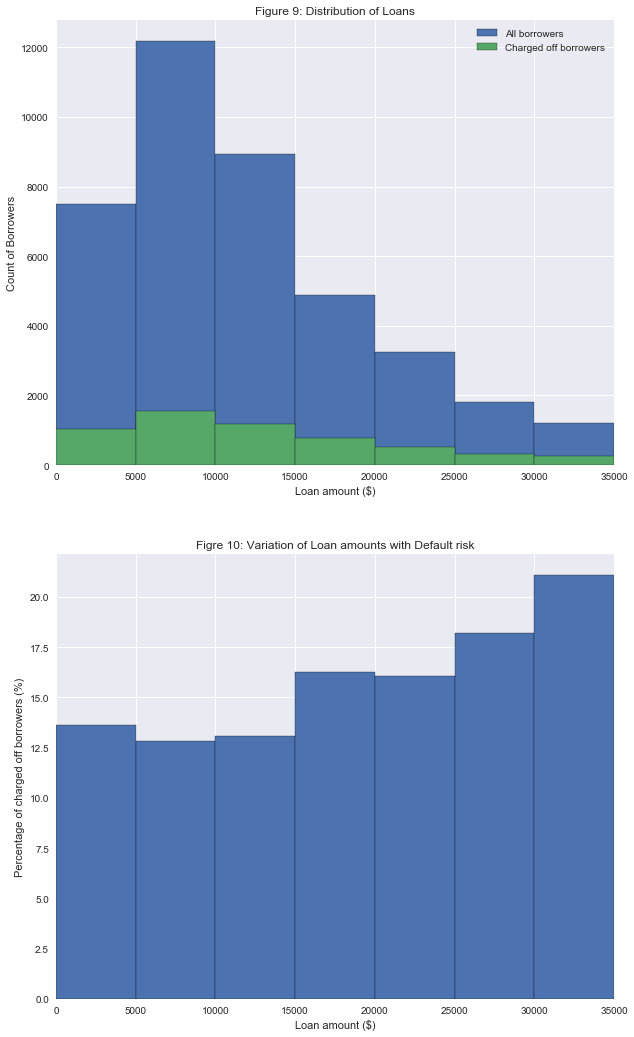

In [8]:
# creating a dataframe of charged off loans
charged_off = loan_data[loan_data['loan_status'] == 0]

# creating empty list for bin edges and specifying bin width
bin_widths = list()
bin_width = 5000

# creating the maximum x axis display
max_el = loan_data.loan_amnt.max()

# filling 
for num in range(int(round((max_el/bin_width)+1))):
    bin_widths.append((num)*bin_width)

# creating figure
plt.figure(figsize = (10,18))

# plotting distribution of loan amounts
plt.subplot(2,1,1)
plt.xlabel("Loan amount ($)")
plt.ylabel('Count of Borrowers')
plt.xlim([0,max_el])
plt.title("Figure 9: Distribution of Loans")

# counting the number of people of each age in the dataset
counts_tot, bins_tot, bars_tot= plt.hist(loan_data.loan_amnt, bins = bin_widths, 
                                         label = 'All borrowers', edgecolor = 'k')

# count of the number of borrowers that were charged off
counts, bins, bars = plt.hist(charged_off['loan_amnt'], bins = bin_widths, 
                              label = "Charged off borrowers", edgecolor = 'k')

# adding a legend to the plot
plt.legend()

# calculating the proportions of loan amounts charged off
proportions = 100*counts/counts_tot

# Make a bar chart showing the proportions of loan amounts in each category that was charged off
plt.subplot(2, 1, 2)
plt.bar(np.arange(0, max_el, bin_width), height = proportions, width = bin_width, align = 'edge',
        edgecolor = 'black')
plt.xlim([0,max_el])
plt.xlabel("Loan amount ($)")
plt.ylabel("Percentage of charged off borrowers (%)")
plt.title('Figre 10: Variation of Loan amounts with Default risk')

In Figure 9, we can see that the loan distribution is right skewed and that most of the borrowers offered on Lending Club market place request a loan amount between \$5,000 to $10,000.   

From Figure 10 we note that as the loan amount increases, there is a general increase in the percentage of defaulters. As expected, this suggests that it is less risky to invest in borrowers requesting smaller loan amounts.